In [1]:
import stlearn as st
import scanpy as sc
data = st.read.file_10x_h5("/home/d.pham/Downloads/V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5")
data.var_names_make_unique()
st.add.image(adata=data, imgpath="/home/d.pham/10X/BCBA/spatial/tissue_hires_image.png")
st.add.positions(data,position_filepath = "/home/d.pham/10X/BCBA/spatial/tissue_positions_list.csv",
                scale_filepath = "/home/d.pham/10X/BCBA/spatial/scalefactors_json.json",
                quality="high")
st.pp.filter_genes(data,min_cells=3)

st.pp.normalize_total(data)
st.pp.log1p(data)

#sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=5, min_disp=0.2)
#data = data[:, data.var.highly_variable]

st.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


Added tissue image to the object!
filtered out 12851 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [2]:
st.em.run_pca(data,n_comps=30)
#st.pp.neighbors(data,n_neighbors=15)


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


In [3]:
st.pp.tiling(data,out_path="../tiling",crop_size = (20))

Tiling image: 100%|██████████ [ time left: 00:00 ]


In [4]:
st.pp.extract_feature(data)

Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [5]:
st.spatials.morphology.adjust(data,use_data="X_pca",radius=33.6666667,method="median")

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


In [8]:
#st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca_morphology')
st.tl.clustering.louvain(data)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


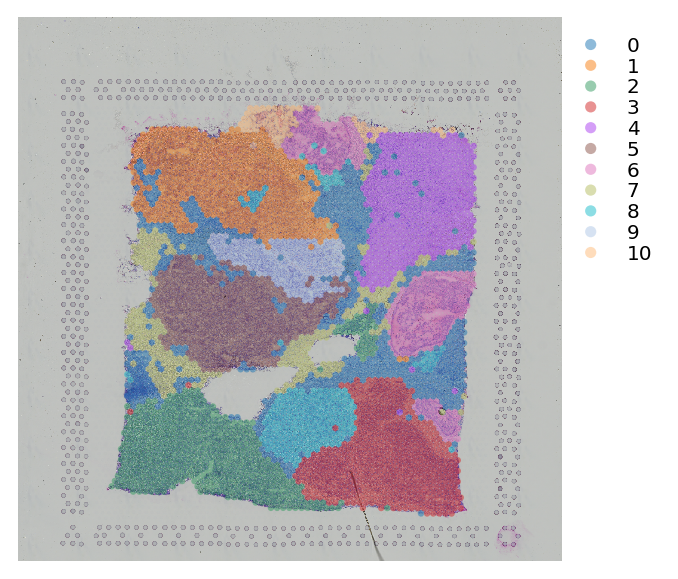

In [9]:
st.pl.cluster_plot(data,use_label="louvain",data_alpha=0.5)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


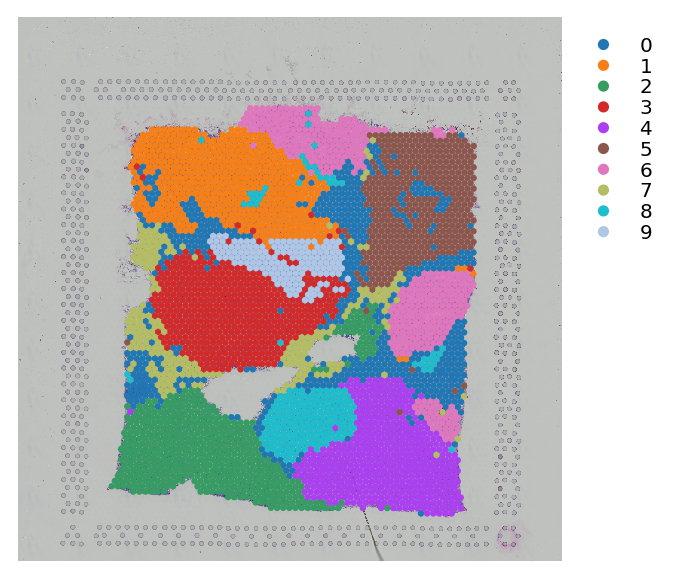

In [59]:
#st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca')
st.tl.clustering.louvain(data,key_added="louvain2")
st.pl.cluster_plot(data,use_label="louvain2",data_alpha=1)

In [39]:
import pandas as pd
seurat_cluster = pd.read_table("../TBI_analysis/seurat_cluster.txt",header=None)

In [72]:
seurat_cluster.values.reshape(1,-1)[0]

array([0, 2, 7, ..., 2, 0, 8])

In [73]:
data.obs["seurat"] = seurat_cluster.values.reshape(1,-1)[0].astype('U')

In [74]:
import numpy as np
from natsort import natsorted
data.obs["seurat"] = pd.Categorical(
        values=np.array(data.obs["seurat"]).astype('U'),
        categories=natsorted(np.unique(np.array(data.obs["seurat"])).astype('U')),
    )
    

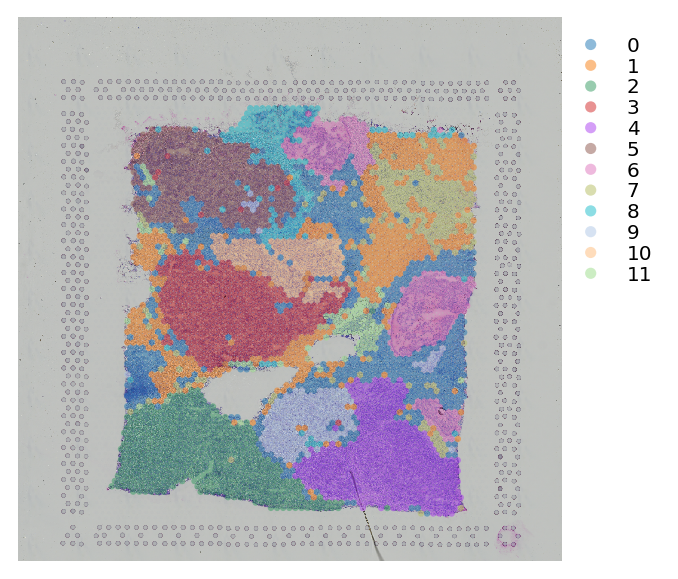

In [75]:

st.pl.cluster_plot(data,use_label="seurat",data_alpha=0.5)

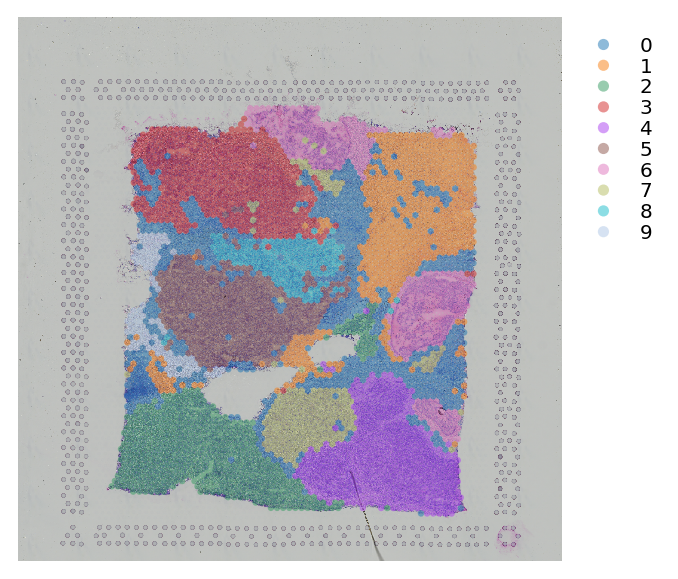

In [70]:

st.pl.cluster_plot(data,use_label="louvain",data_alpha=0.5)

In [22]:
import scanpy as sc
sc.tl.rank_genes_groups(data,'louvain')

... storing 'feature_types' as categorical
... storing 'genome' as categorical
/home/d.pham/anaconda3/envs/stlearn/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


In [24]:
data.uns["rank_genes_groups"]

{'params': {'groupby': 'louvain',
  'reference': 'rest',
  'method': 't-test_overestim_var',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'scores': rec.array([(29.180882 , 30.885035 , 48.408184, 62.99798  , 34.23711  , 25.005508 , 42.137676 , 23.445967 , 25.192354 , 18.511967 ),
            (28.707869 , 24.832565 , 35.183147, 51.86974  , 22.999235 , 11.511635 , 22.908558 , 21.102585 , 16.28059  , 14.40401  ),
            (28.587263 , 23.673212 , 34.071827, 33.671463 , 22.270975 ,  9.45634  , 19.629837 , 17.217737 , 15.933252 , 13.345412 ),
            (28.504353 , 23.65089  , 31.06707 , 29.410332 , 21.914803 ,  8.953654 , 18.890383 , 16.949724 , 15.840754 , 13.105578 ),
            (27.80507  , 23.267132 , 30.844498, 27.963709 , 21.161303 ,  8.821744 , 18.597265 , 16.835394 , 14.86863  , 12.824203 ),
            (27.608463 , 22.218353 , 30.617851, 27.140213 , 20.686935 ,  8.547321 , 16.825241 , 16.571198 , 14.261283 , 12.539366 ),
            (26.869556 

In [20]:
#st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=50,use_rep='X_pca')
st.tl.clustering.louvain(data,key_added="louvain2")

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


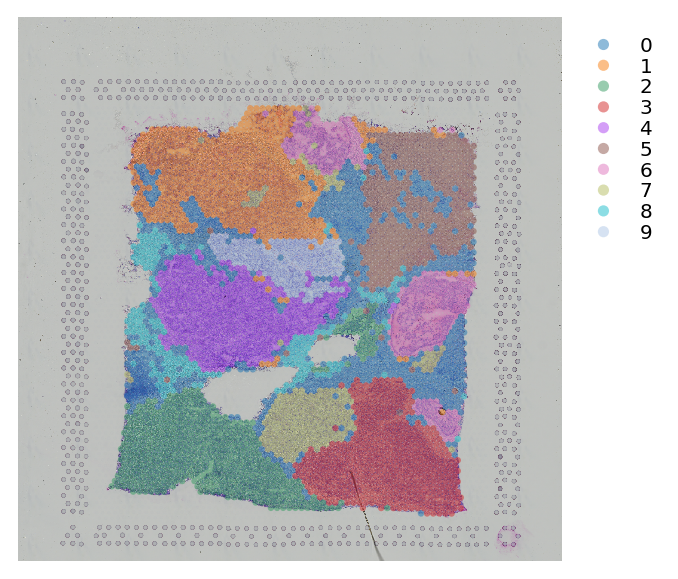

In [21]:
st.pl.cluster_plot(data,use_label="louvain2",data_alpha=0.5)